In [4]:
#Install pystan (if not already installed)
#Code should be disabled after first run

#!conda install -c conda-forge pystan
#!pip install pystan

In [5]:
#Install fbprophet (if not already installed)
#Code should be disabled after first run

#!conda install -c conda-forge fbprophet -y
#!pip install fbprophet

In [6]:
#Upgrade plotly after installing fbprophet
#Code should be disabled after first run

#!pip install --upgrade plotly

In [7]:
#Import dependencies

import pandas as pd
import numpy as np
import datetime
import requests
from pprint import pprint
from fbprophet import Prophet

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats

In [8]:
df = pd.read_csv('data/WMT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.037027,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036887,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.036466,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.036466,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035905,870400


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12242.000000,12242.000000,12242.000000,12242.000000,12242.000000,1.224200e+04
mean,33.323517,33.640010,33.008329,33.329019,27.098417,7.527616e+06
std,34.336433,34.632807,34.052622,34.342539,31.485295,6.279231e+06
min,0.015625,0.015625,0.014404,0.015625,0.009031,0.000000e+00
25%,1.332031,1.352540,1.320313,1.335938,0.836820,3.835650e+06
50%,14.843750,14.937500,14.687500,14.875000,9.767956,6.278500e+06
75%,55.240002,55.933124,54.637500,55.250000,40.818147,9.515550e+06
max,153.600006,153.660004,151.660004,152.789993,152.233536,1.318336e+08


In [10]:
priceVolume = df[['Close','Volume']]
priceVolume.head()

,Close,Volume
0,0.064453,2508800
1,0.064209,972800
2,0.063477,1945600
3,0.063477,409600
4,0.062500,870400


In [11]:
# from sklearn.preprocessing import MinMaxScaler


In [12]:
corr = scipy.stats.linregress(priceVolume)
corr.rvalue

0.34706411528828335

In [13]:
#plot linear regression

In [14]:
# Select only the important features i.e. the date and price
data = df[["Date","Close"]] # select Date and Price

#Ensure 'Date' is in date format
data['Date'] = pd.to_datetime(data['Date'])

ticker = "WMT"
start_date = "2010-01-01"

<ipython-input-14-a8326af7ec92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [15]:
walmartFiltered = data.loc[data['Date'] >= start_date, ['Date','Close']]
walmartFiltered.head(10)

,Date,Close
9425,2010-01-04,54.230000
9426,2010-01-05,53.689999
9427,2010-01-06,53.570000
9428,2010-01-07,53.599998
9429,2010-01-08,53.330002
9430,2010-01-11,54.209999
9431,2010-01-12,54.730000
9432,2010-01-13,55.009998
9433,2010-01-14,54.209999
9434,2010-01-15,53.680000


In [27]:
walmartCleaned = walmartFiltered.set_index('Date')
walmartCleaned.head()

,Close
Date,
2010-01-04,54.230000
2010-01-05,53.689999
2010-01-06,53.570000
2010-01-07,53.599998
2010-01-08,53.330002


In [28]:
#export to csv for posterity
walmartCleaned.to_csv(r'C:\Users\mayla\Desktop\retail-ML\WMTfiltered.csv', index='date', header=True)

In [29]:
df = pd.read_csv(r'C:\Users\mayla\Desktop\retail-ML\WMTfiltered.csv')
df.head()

,Date,Close
0,2010-01-04,54.230000
1,2010-01-05,53.689999
2,2010-01-06,53.570000
3,2010-01-07,53.599998
4,2010-01-08,53.330002


<AxesSubplot:xlabel='Date', ylabel='Close'>

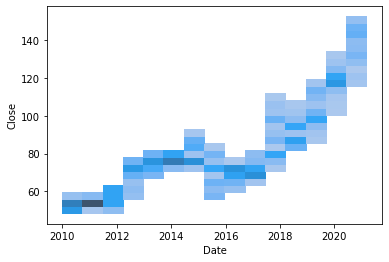

In [16]:
#Trying out seaborn
sns.histplot(walmartFiltered, x='Date', y='Close')

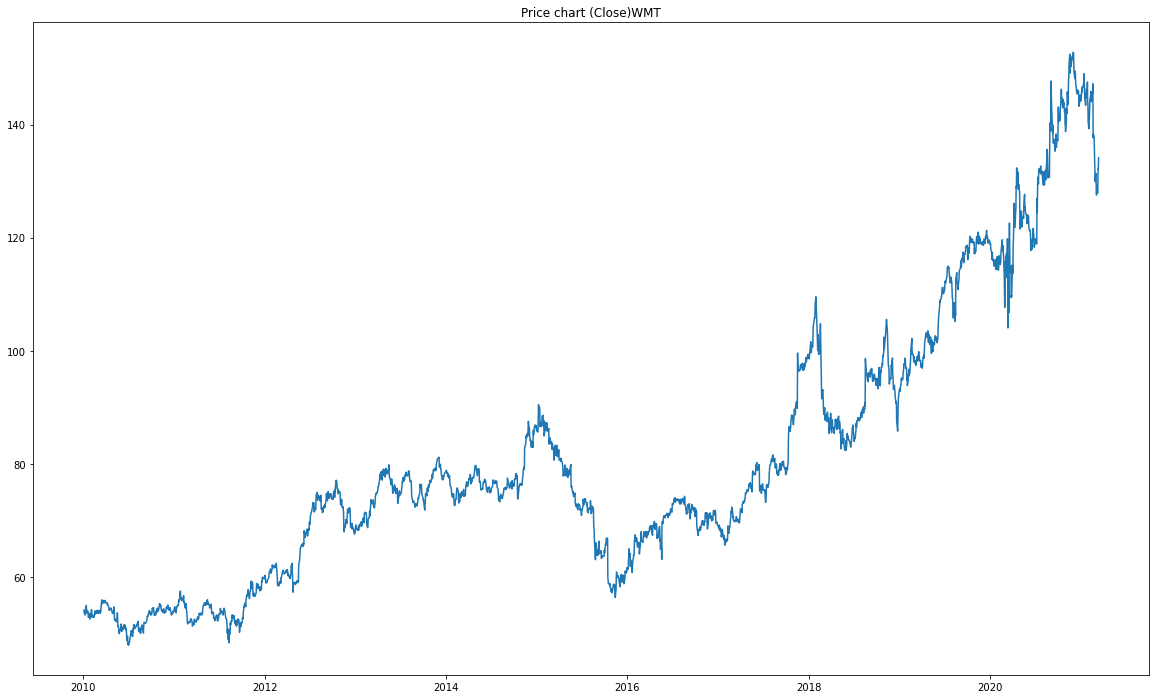

In [17]:
plt.figure(figsize=(20,12))
plt.plot(walmartFiltered['Date'], walmartFiltered['Close'])
plt.title('Price chart (Close)' + ticker)
plt.show()

In [18]:
# Rename the features: These names are NEEDED for the model fitting
datePrice = walmartFiltered.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
datePrice.head(5)

,ds,y
9425,2010-01-04,54.230000
9426,2010-01-05,53.689999
9427,2010-01-06,53.570000
9428,2010-01-07,53.599998
9429,2010-01-08,53.330002


In [19]:
model = Prophet(daily_seasonality=True)
model.fit(datePrice)
datePrice.tail()

,ds,y
12237,2021-03-08,127.879997
12238,2021-03-09,128.889999
12239,2021-03-10,132.179993
12240,2021-03-11,132.130005
12241,2021-03-12,134.119995


In [20]:
future_df = model.make_future_dataframe(periods=365)
future_df.tail()

,ds
3177,2022-03-08
3178,2022-03-09
3179,2022-03-10
3180,2022-03-11
3181,2022-03-12


In [21]:
predictions = model.predict(future_df)
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3177,2022-03-08,167.957120,147.869921,179.312135,152.143663,180.861141,-2.439203,-2.439203,-2.439203,-0.056123,...,0.137385,0.137385,0.137385,-2.520465,-2.520465,-2.520465,0.0,0.0,0.0,165.517917
3178,2022-03-09,168.018791,148.456325,179.137564,152.149053,180.984649,-2.570684,-2.570684,-2.570684,-0.056123,...,-0.009135,-0.009135,-0.009135,-2.505426,-2.505426,-2.505426,0.0,0.0,0.0,165.448106
3179,2022-03-10,168.080462,148.148881,178.696838,152.154443,181.154590,-2.573880,-2.573880,-2.573880,-0.056123,...,-0.038384,-0.038384,-0.038384,-2.479373,-2.479373,-2.479373,0.0,0.0,0.0,165.506582
3180,2022-03-11,168.142132,148.351384,179.434291,152.159833,181.324531,-2.533706,-2.533706,-2.533706,-0.056123,...,-0.034081,-0.034081,-0.034081,-2.443502,-2.443502,-2.443502,0.0,0.0,0.0,165.608426
3181,2022-03-12,168.203803,149.354774,178.735708,152.165222,181.492662,-2.448195,-2.448195,-2.448195,-0.056123,...,0.007016,0.007016,0.007016,-2.399087,-2.399087,-2.399087,0.0,0.0,0.0,165.755608


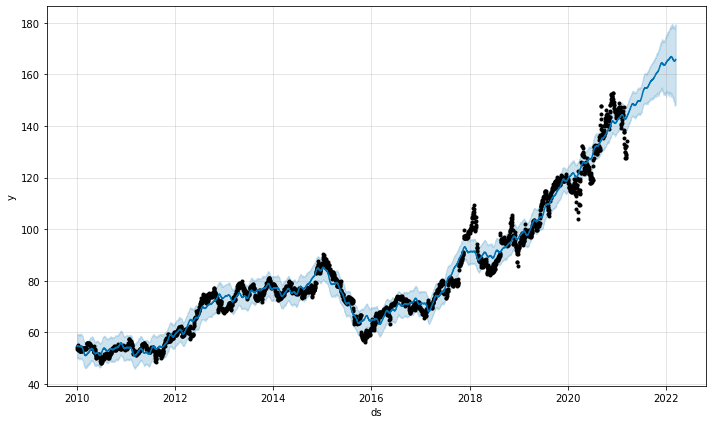

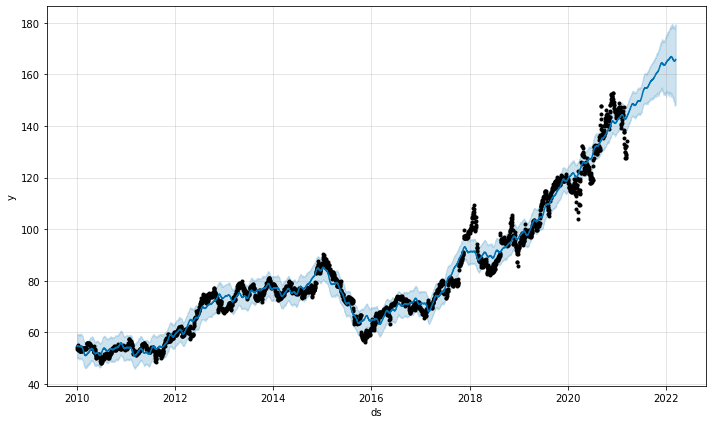

In [22]:
model.plot(predictions)

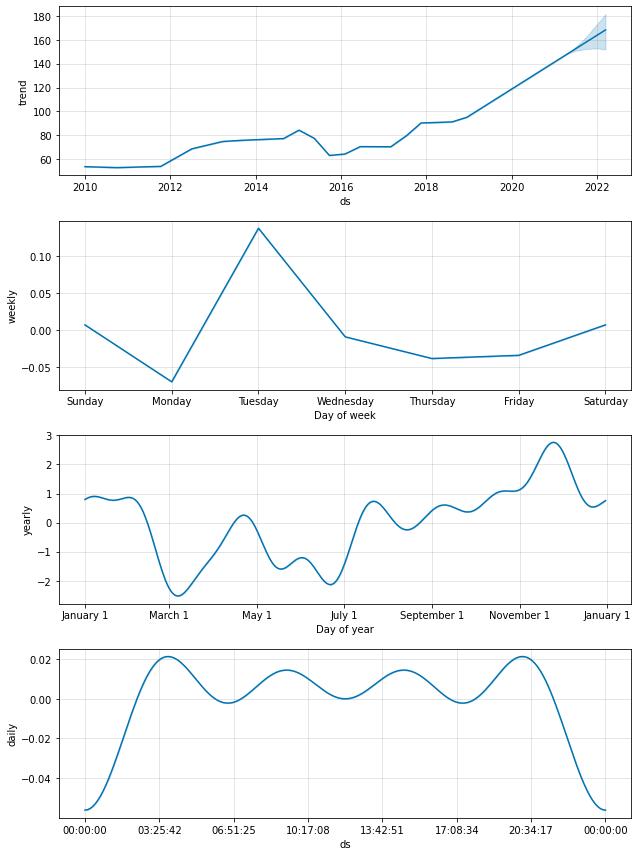

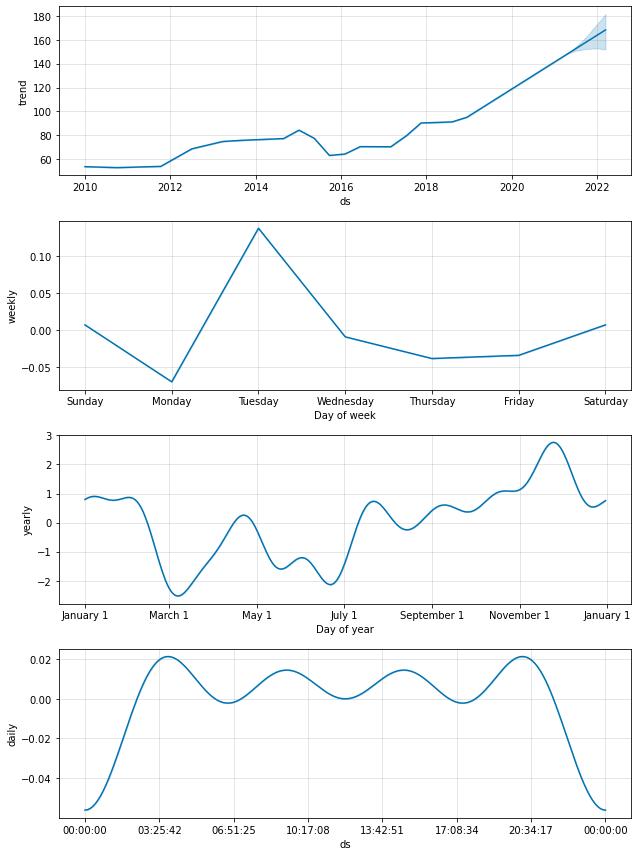

In [23]:
model.plot_components(predictions)

In [29]:
from fbprophet.diagnostics import cross_validation
priceCV = cross_validation(model, initial='1095 days', period='180 days', horizon = '365 days')
priceCV.head()

INFO:fbprophet:Making 15 forecasts with cutoffs between 2013-04-18 00:00:00 and 2020-03-12 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-04-19,77.266808,76.038833,78.501871,78.290001,2013-04-18
1,2013-04-22,77.398031,76.120084,78.668666,77.970001,2013-04-18
2,2013-04-23,77.544926,76.350495,78.749255,79.089996,2013-04-18
3,2013-04-24,77.505942,76.305761,78.845887,78.029999,2013-04-18
4,2013-04-25,77.494896,76.210838,78.786123,78.650002,2013-04-18


In [30]:
priceCV

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-04-19,77.266808,76.038833,78.501871,78.290001,2013-04-18
1,2013-04-22,77.398031,76.120084,78.668666,77.970001,2013-04-18
2,2013-04-23,77.544926,76.350495,78.749255,79.089996,2013-04-18
3,2013-04-24,77.505942,76.305761,78.845887,78.029999,2013-04-18
4,2013-04-25,77.494896,76.210838,78.786123,78.650002,2013-04-18
...,...,...,...,...,...,...
3769,2021-03-08,131.554508,119.471435,144.166819,127.879997,2020-03-12
3770,2021-03-09,131.770792,119.715834,143.575180,128.889999,2020-03-12
3771,2021-03-10,131.684256,119.439362,143.589278,132.179993,2020-03-12
3772,2021-03-11,131.709366,119.381834,143.783750,132.130005,2020-03-12


In [31]:
from fbprophet.diagnostics import performance_metrics
priceMetrics = performance_metrics(priceCV)
priceMetrics.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
325,361 days,195.397694,13.978473,11.835077,0.144333,0.109850,0.763395
326,362 days,196.380867,14.013596,11.852275,0.144650,0.109819,0.764408
327,363 days,196.622770,14.022224,11.829425,0.144403,0.107813,0.766337
328,364 days,193.147125,13.897738,11.714491,0.143036,0.107212,0.775066
329,365 days,192.250013,13.865425,11.685756,0.142597,0.107212,0.778394


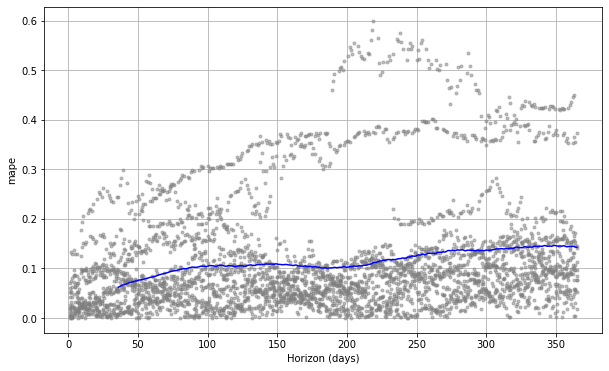

In [32]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(priceCV, metric = 'mape')

In [35]:
walmartFiltered2 = df[["Date","Volume"]] # select Date and Volume

# Rename the features: These names are NEEDED for the model fitting
dateVolume = walmartFiltered2.rename(columns = {"Date":"ds","Volume":"y"}) #renaming the columns of the dataset
dateVolume.head(5)

,ds,y
0,1972-08-25,2508800
1,1972-08-28,972800
2,1972-08-29,1945600
3,1972-08-30,409600
4,1972-08-31,870400


In [36]:
model2 = Prophet(daily_seasonality=True)
model2.fit(dateVolume)
dateVolume.tail()

,ds,y
12237,2021-03-08,13651600
12238,2021-03-09,10631100
12239,2021-03-10,14959700
12240,2021-03-11,11822600
12241,2021-03-12,9473500


In [37]:
future2_df = model2.make_future_dataframe(periods=365)
future2_df.tail()

,ds
12602,2022-03-08
12603,2022-03-09
12604,2022-03-10
12605,2022-03-11
12606,2022-03-12


In [38]:
predictions2 = model2.predict(future_df)
predictions2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3177,2022-03-08,8.653585e+06,2.645234e+06,1.425503e+07,8.304704e+06,8.995050e+06,188632.294011,188632.294011,188632.294011,-978613.628844,...,-30117.771842,-30117.771842,-30117.771842,1.197364e+06,1.197364e+06,1.197364e+06,0.0,0.0,0.0,8.842218e+06
3178,2022-03-09,8.653123e+06,2.905340e+06,1.457118e+07,8.303094e+06,8.995742e+06,222787.647108,222787.647108,222787.647108,-978613.628844,...,82891.800626,82891.800626,82891.800626,1.118509e+06,1.118509e+06,1.118509e+06,0.0,0.0,0.0,8.875910e+06
3179,2022-03-10,8.652660e+06,2.759530e+06,1.474698e+07,8.301598e+06,8.996433e+06,238771.441362,238771.441362,238771.441362,-978613.628844,...,183781.791734,183781.791734,183781.791734,1.033603e+06,1.033603e+06,1.033603e+06,0.0,0.0,0.0,8.891431e+06
3180,2022-03-11,8.652197e+06,3.220648e+06,1.442476e+07,8.300103e+06,8.997125e+06,182661.891054,182661.891054,182661.891054,-978613.628844,...,217256.056372,217256.056372,217256.056372,9.440195e+05,9.440195e+05,9.440195e+05,0.0,0.0,0.0,8.834859e+06
3181,2022-03-12,8.651735e+06,2.974458e+06,1.446219e+07,8.298607e+06,8.997816e+06,-5133.158755,-5133.158755,-5133.158755,-978613.628844,...,122326.619139,122326.619139,122326.619139,8.511539e+05,8.511539e+05,8.511539e+05,0.0,0.0,0.0,8.646601e+06


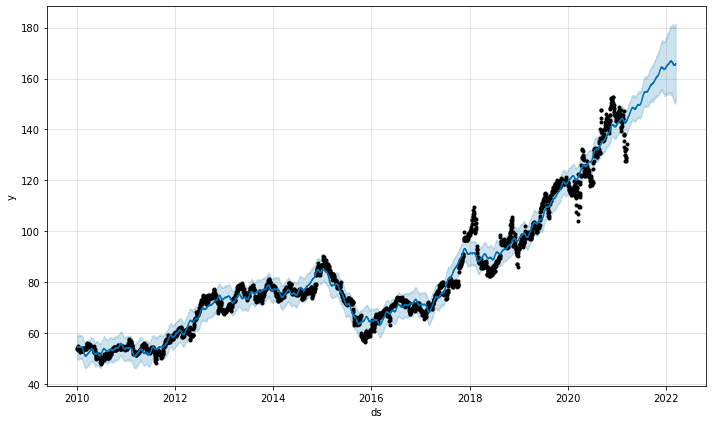

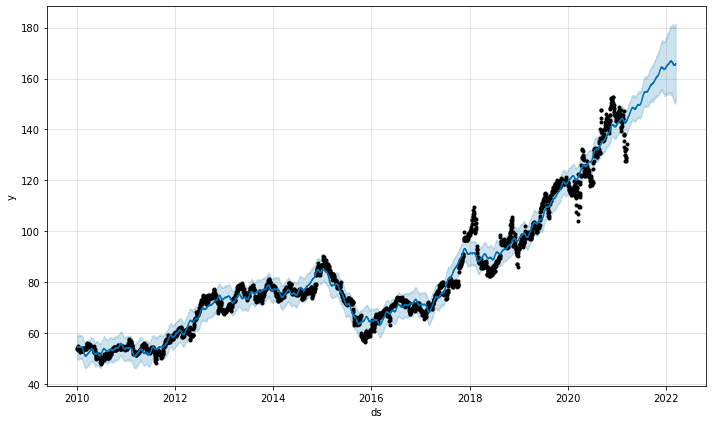

In [39]:
model.plot(predictions)

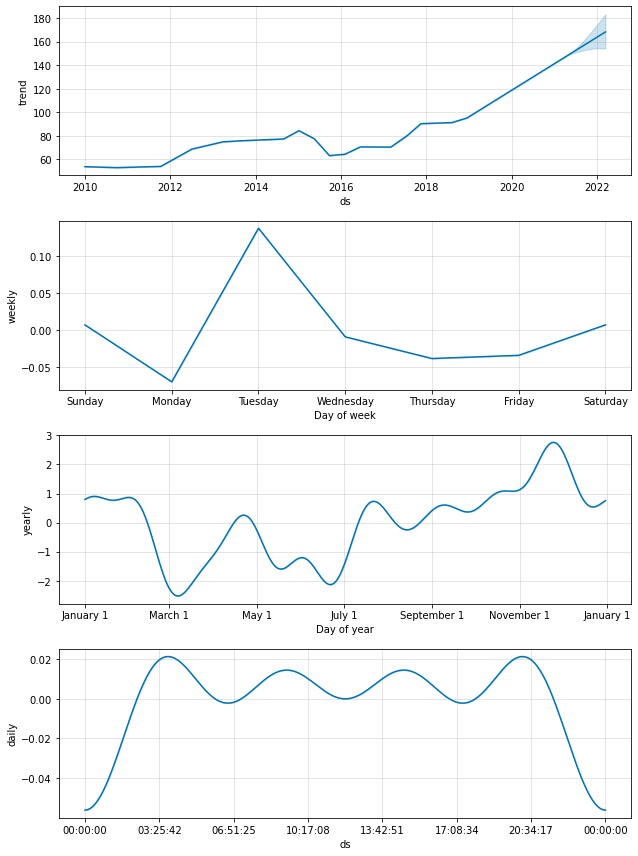

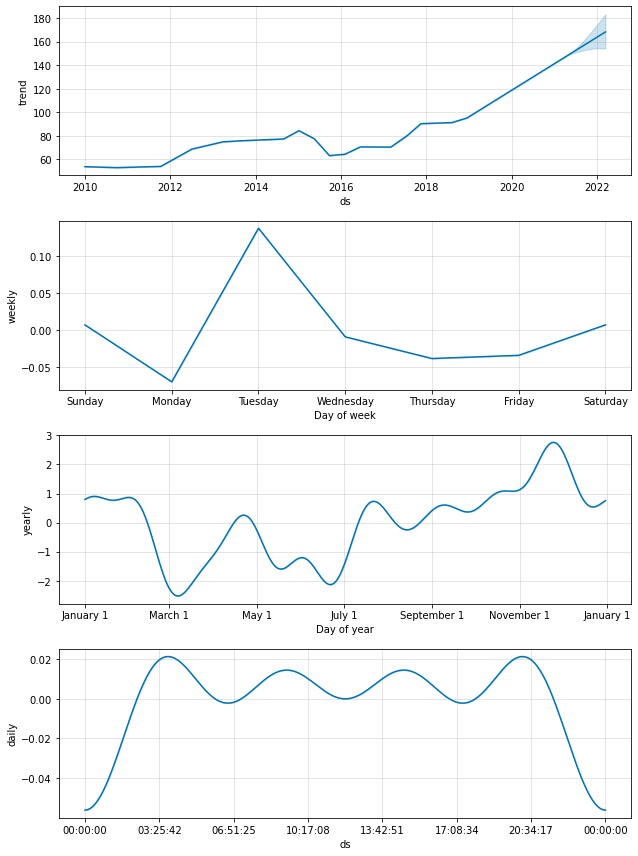

In [40]:
model.plot_components(predictions)

In [41]:
from fbprophet.diagnostics import cross_validation
volumeCV = cross_validation(model, initial='1095 days', period='180 days', horizon = '365 days')
volumeCV.head()

INFO:fbprophet:Making 15 forecasts with cutoffs between 2013-04-18 00:00:00 and 2020-03-12 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-04-19,77.266808,76.089075,78.491317,78.290001,2013-04-18
1,2013-04-22,77.398031,76.110270,78.598020,77.970001,2013-04-18
2,2013-04-23,77.544926,76.283938,78.769445,79.089996,2013-04-18
3,2013-04-24,77.505942,76.285366,78.699119,78.029999,2013-04-18
4,2013-04-25,77.494896,76.263391,78.680782,78.650002,2013-04-18


In [42]:
volumeCV

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-04-19,77.266808,76.038833,78.501871,78.290001,2013-04-18
1,2013-04-22,77.398031,76.120084,78.668666,77.970001,2013-04-18
2,2013-04-23,77.544926,76.350495,78.749255,79.089996,2013-04-18
3,2013-04-24,77.505942,76.305761,78.845887,78.029999,2013-04-18
4,2013-04-25,77.494896,76.210838,78.786123,78.650002,2013-04-18
...,...,...,...,...,...,...
3769,2021-03-08,131.554508,119.471435,144.166819,127.879997,2020-03-12
3770,2021-03-09,131.770792,119.715834,143.575180,128.889999,2020-03-12
3771,2021-03-10,131.684256,119.439362,143.589278,132.179993,2020-03-12
3772,2021-03-11,131.709366,119.381834,143.783750,132.130005,2020-03-12


In [43]:
from fbprophet.diagnostics import performance_metrics
volumeMetrics = performance_metrics(volumeCV)
volumeMetrics.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
325,361 days,195.397694,13.978473,11.835077,0.144333,0.109850,0.781963
326,362 days,196.380867,14.013596,11.852275,0.144650,0.109819,0.782976
327,363 days,196.622770,14.022224,11.829425,0.144403,0.107813,0.782976
328,364 days,193.147125,13.897738,11.714491,0.143036,0.107212,0.790981
329,365 days,192.250013,13.865425,11.685756,0.142597,0.107212,0.792380


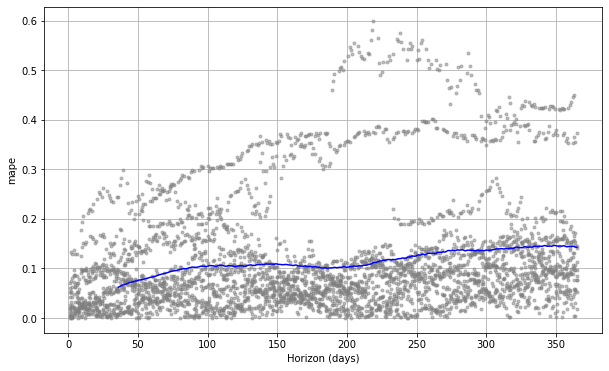

In [45]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(volumeCV, metric = 'mape')

# HOLIDAY ANALYSIS

## Setup

In [51]:
#Import API Key
%run config.ipynb

#Test API
year=2010
country='CA'

# Build query url:
url = f'https://calendarific.com/api/v2/holidays?&api_key={Holiday_API}&country={country}&year={year}'

# Request url and print json file:
response = requests.get(url).json()
pprint(response)

{'meta': {'code': 200},
 'response': {'holidays': [{'country': {'id': 'ca', 'name': 'Canada'},
                            'date': {'datetime': {'day': 1,
                                                  'month': 1,
                                                  'year': 2010},
                                     'iso': '2010-01-01'},
                            'description': "New Year's Day is the first day of "
                                           'a new year according to the '
                                           'Gregorian calendar used in Canada '
                                           'and many other countries.',
                            'locations': 'All',
                            'name': "New Year's Day",
                            'states': 'All',
                            'type': ['National holiday']},
                           {'country': {'id': 'ca', 'name': 'Canada'},
                            'date': {'datetime': {'day': 2,
               

                                                  'minute': 28,
                                                  'month': 6,
                                                  'second': 24,
                                                  'year': 2010},
                                     'iso': '2010-06-21T07:28:24-04:00',
                                     'timezone': {'offset': '-04:00',
                                                  'zoneabb': 'EDT',
                                                  'zonedst': 3600,
                                                  'zoneoffset': -18000,
                                                  'zonetotaloffset': -14400}},
                            'description': 'June Solstice in Canada (Ottawa)',
                            'locations': 'All',
                            'name': 'June Solstice',
                            'states': 'All',
                            'type': ['Season']},
                           {'country': {'i

                                           'Hebrew calendar.',
                            'locations': 'All',
                            'name': 'First Day of Hanukkah',
                            'states': 'All',
                            'type': ['Hebrew']},
                           {'country': {'id': 'ca', 'name': 'Canada'},
                            'date': {'datetime': {'day': 8,
                                                  'month': 12,
                                                  'year': 2010},
                                     'iso': '2010-12-08'},
                            'description': 'The Feast of the Immaculate '
                                           'Conception is a Christian '
                                           'observance on December 8 each '
                                           'year.',
                            'locations': 'All',
                            'name': 'Feast of the Immaculate Conception',
                    

In [54]:
# Set holidays, country and years we want dates:
holiday = ['Christmas Day','Christmas Eve','Independence Day',"New Year's Day", "Thanksgiving Day"]
country = 'US'
year = [2010,2011,2013,
       2014,2015,2016,
       2017,2018,2019,
       2020,2021,2022]

# Loops through API and get dates:
holiday_name = []
holiday_date =[]
category = []
holiday_year = []

for number in year:
    # Set url base
    url = f'https://calendarific.com/api/v2/holidays?&api_key={Holiday_API}&country={country}&year={number}'
    response = requests.get(url).json()
    
    #Loop through holiday
    for name in holiday:
        # Loop through API
        for i in range(len(response['response']['holidays'])):
            if name == response['response']['holidays'][i]['name']:
                holiday_date.append(response['response']['holidays'][i]['date']['iso'])
                category.append(name)
                holiday_year.append(number)
                break
                
# Create dataframes of lists created:
holiday_df = pd.DataFrame({'Holiday': category,
                        'Year': holiday_year,
                        'Date': holiday_date})

# Display preview:
holiday_df.tail(20)

,Holiday,Year,Date
40,Christmas Day,2019,2019-12-25
41,Christmas Eve,2019,2019-12-24
42,Independence Day,2019,2019-07-04
43,New Year's Day,2019,2019-01-01
44,Thanksgiving Day,2019,2019-11-28
45,Christmas Day,2020,2020-12-25
46,Christmas Eve,2020,2020-12-24
47,Independence Day,2020,2020-07-04
48,New Year's Day,2020,2020-01-01
49,Thanksgiving Day,2020,2020-11-26


In [57]:
walmartFiltered['Close'].astype(float)

9425      54.230000
9426      53.689999
9427      53.570000
9428      53.599998
9429      53.330002
            ...    
12237    127.879997
12238    128.889999
12239    132.179993
12240    132.130005
12241    134.119995
Name: Close, Length: 2817, dtype: float64

In [74]:
holidayDates = holiday_df['Date'].tolist()

In [75]:
holidayDates

['2010-12-25',
 '2010-12-24',
 '2010-07-04',
 '2010-01-01',
 '2010-11-25',
 '2011-12-25',
 '2011-12-24',
 '2011-07-04',
 '2011-01-01',
 '2011-11-24',
 '2013-12-25',
 '2013-12-24',
 '2013-07-04',
 '2013-01-01',
 '2013-11-28',
 '2014-12-25',
 '2014-12-24',
 '2014-07-04',
 '2014-01-01',
 '2014-11-27',
 '2015-12-25',
 '2015-12-24',
 '2015-07-04',
 '2015-01-01',
 '2015-11-26',
 '2016-12-25',
 '2016-12-24',
 '2016-07-04',
 '2016-01-01',
 '2016-11-24',
 '2017-12-25',
 '2017-12-24',
 '2017-07-04',
 '2017-01-01',
 '2017-11-23',
 '2018-12-25',
 '2018-12-24',
 '2018-07-04',
 '2018-01-01',
 '2018-11-22',
 '2019-12-25',
 '2019-12-24',
 '2019-07-04',
 '2019-01-01',
 '2019-11-28',
 '2020-12-25',
 '2020-12-24',
 '2020-07-04',
 '2020-01-01',
 '2020-11-26',
 '2021-12-25',
 '2021-12-24',
 '2021-07-04',
 '2021-01-01',
 '2021-11-25',
 '2022-12-25',
 '2022-12-24',
 '2022-07-04',
 '2022-01-01',
 '2022-11-24']

In [3]:
walmartHolidays = walmartFiltered[walmartFiltered.Date.isin(holidayDates)]
walmartHolidays

NameError: name 'walmartFiltered' is not defined

In [ ]:
# model3 = Prophet(daily_seasonality=True)
# model2.fit(dateVolume)
# dateVolume.tail()